# Notebook #2: Preprocesamiento

- En este notebook realizaremos prepararemos los datos para ser utilizados por un modelo.

- Todas las funciones aquí utilizadas encuentran su soporte en `../src/soporte_prep.py`

- El primer paso será importar las librerías necesarias:

In [493]:
%load_ext autoreload
%autoreload 2

# Librerías para tratamiento de datos

import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None) # Parámetro que modifica la visualización de los DFs

# Librería para el acceso a variables y funciones
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sp
from src import soporte_asunciones as sa
from src import soporte_encoding as se
from src import soporte_scaling as ss

# Librerías para feature scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librerías para trabajar con distintos formatos de archivos
import pickle
import json

# Librería para ignorar avisos
import warnings
warnings.filterwarnings("ignore") # Ignora TODOS los avisos

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Ahora importaremos los archivos GeoJSON generados en el notebook #1, y trataremos cada archivo por separado.
- En el caso de los datos de ventas, únicamente analizaremos su contenido, serán los datos de alquiler que trataremos en detalle para crear un modelo de regresión.

1. **Análisis exploratorio de datos (EDA):**
   - Visualizar la distribución de las principales variables.
   - Explorar relaciones entre las características y la variable objetivo (`price`).

2. **Limpieza de datos:**

   - Identificar y tratar valores nulos.
   - Eliminar duplicados si existen.
   - Asegurar que las variables tienen el tipo de dato correcto.

3. **Transformación de variables:**

   - Normalizar o escalar variables numéricas según sea necesario.
   - Codificar variables categóricas con técnicas como One-Hot Encoding, Target Encoding u Ordinal Encoding, según corresponda.


## DataFrame Venta
### Análisis Exploratorio de Datos

- Importamos el dataframe creado en el notebook #1.

In [354]:
df_sale = pd.read_csv('../data/raw/idealista_sale.csv', index_col=0)
df_sale.head(1)

,codigo,latitud,longitud,precio,precio_por_zona,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,estado,direccion,descripcion,fecha,anunciante,contacto,cantidad_imagenes,urls_imagenes,tags_imagenes
0,104792745,41.697302,-0.869352,149900.0,1180.0,piso,True,4,True,127.0,3,2,False,False,False,True,good,"carretera de Huesca, 21","Junto a la Academia General Militar, en carret...",NaN,FINCAS RUIZ,876210884,39,['https://img4.idealista.com/blur/WEB_LISTING-...,"['views', 'livingRoom', 'kitchen', 'facade', '..."


- Como primer paso, eliminaremos la columna "Fecha", por no contener valores.

In [355]:
df_sale.drop(columns="fecha", inplace=True)

In [356]:
sp.exploracion_datos(df_sale)

El número de filas es 480 y el número de columnas es 24

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


exterior              22.083333
planta                20.416667
ascensor              18.750000
aire_acondicionado     1.666667
trastero               3.333333
terraza                4.583333
patio                  5.416667
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
codigo,480.0,1.051967e+08,4.462097e+06,3.511038e+07,1.051747e+08,1.063738e+08,1.068470e+08,1.070283e+08
latitud,480.0,4.165658e+01,2.483322e-02,4.158931e+01,4.164503e+01,4.165162e+01,4.165763e+01,4.176284e+01
longitud,480.0,-9.007687e-01,5.146088e-02,-1.089886e+00,-9.071134e-01,-8.871673e-01,-8.729743e-01,-7.790395e-01
precio,480.0,1.163135e+05,2.441480e+04,6.000000e+04,9.800000e+04,1.205000e+05,1.380250e+05,1.500000e+05
precio_por_zona,480.0,1.599590e+03,5.572762e+02,1.760000e+02,1.242750e+03,1.623500e+03,1.998500e+03,2.998000e+03
tamanio,480.0,8.633333e+01,6.323447e+01,3.400000e+01,5.800000e+01,7.000000e+01,8.700000e+01,8.500000e+02
habitaciones,480.0,2.370833e+00,1.007272e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
banios,480.0,1.102083e+00,3.419150e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
cantidad_imagenes,480.0,2.131875e+01,1.132461e+01,1.000000e+00,1.400000e+01,2.000000e+01,2.700000e+01,6.800000e+01



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
tipo,480,6,piso,375
exterior,374,2,True,317
planta,382,14,2,97
ascensor,390,2,False,203
aire_acondicionado,472,2,False,334
trastero,464,2,False,366
terraza,458,2,False,280
patio,454,2,False,411
estado,480,3,good,370
direccion,480,357,Casetas - Garrapinillos - Monzalbarba,11



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 479
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   codigo              480 non-null    int64  
 1   latitud             480 non-null    float64
 2   longitud            480 non-null    float64
 3   precio              480 non-null    float64
 4   precio_por_zona     480 non-null    float64
 5   tipo                480 non-null    object 
 6   exterior            374 non-null    object 
 7   planta              382 non-null    object 
 8   ascensor            390 non-null    object 
 9   tamanio             480 non-null    float64
 10  habitaciones        480 non-null    int64  
 11  banios              480 non-null    int64  
 12  aire_acondicionado  472 non-null    object 
 13  trastero            464 non-null    object 
 14  terraza             458 non-null    object 
 15

None

- Vamos a identificar dónde están los valores nulos.

In [357]:
df_sale.isna().sum()

codigo                  0
latitud                 0
longitud                0
precio                  0
precio_por_zona         0
tipo                    0
exterior              106
planta                 98
ascensor               90
tamanio                 0
habitaciones            0
banios                  0
aire_acondicionado      8
trastero               16
terraza                22
patio                  26
estado                  0
direccion               0
descripcion             0
anunciante              0
contacto                0
cantidad_imagenes       0
urls_imagenes           0
tags_imagenes           0
dtype: int64

- Estando todos en columnas categóricas, los rellenaremos con una nueva categoría "ND".

In [358]:
columnas_fillna_sale = ["exterior", "planta", "ascensor", "trastero", "terraza", "patio"]
df_sale[columnas_fillna_sale] = df_sale[columnas_fillna_sale].fillna("ND")

- Comprobamos que no tenemos más valores nulos.

In [359]:
df_sale.isna().sum()

codigo                0
latitud               0
longitud              0
precio                0
precio_por_zona       0
tipo                  0
exterior              0
planta                0
ascensor              0
tamanio               0
habitaciones          0
banios                0
aire_acondicionado    8
trastero              0
terraza               0
patio                 0
estado                0
direccion             0
descripcion           0
anunciante            0
contacto              0
cantidad_imagenes     0
urls_imagenes         0
tags_imagenes         0
dtype: int64

- Vamos ahora a eliminar los duplicados y comprobar que se hayan eliminado.

In [360]:
df_sale.drop_duplicates(inplace=True)

In [361]:
df_sale.duplicated().sum()

0

- Vamos ahora a analizar las variables numéricas y categóricas, para lo cual, utilizamos primero una función para separarlas.

In [362]:
df_num_sale, df_cat_sale = sp.separar_dataframe(df_sale)

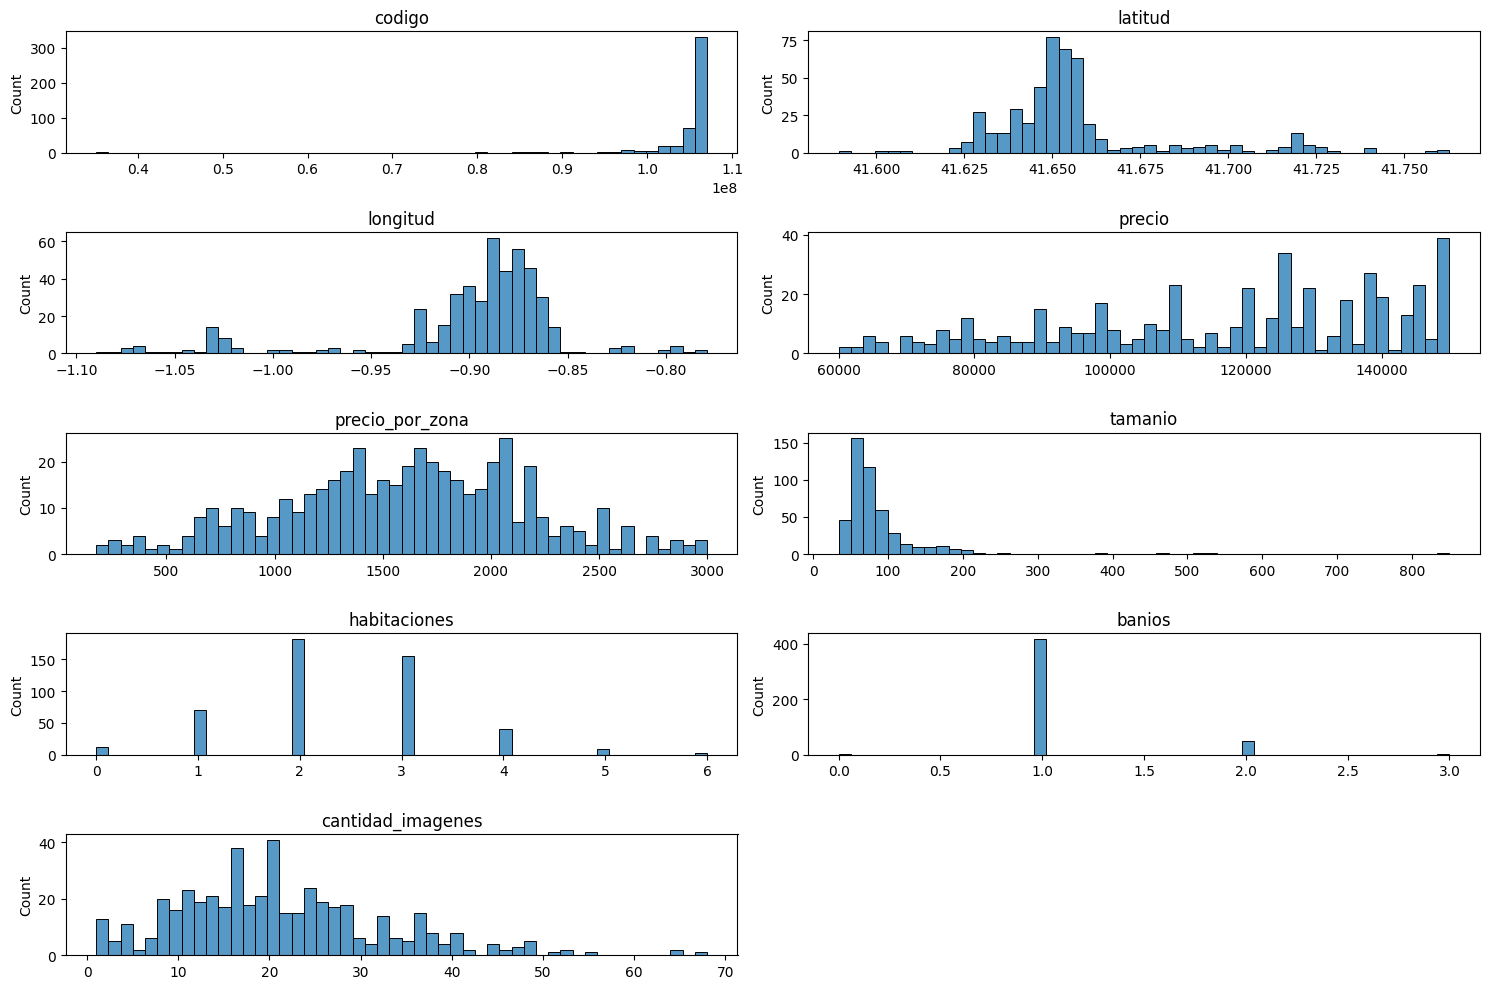

In [363]:
sp.plot_numericas(df_num_sale)

- En la gráfica, debemos identificar primero las variables que no interesa analizar, como lo son el código, por se único, y la latitud y la longitud, que corresponden a datos geográficos.

- En el caso del precio, precio por zona, tamaño y cantidad de imágenes, vemos que, se comportan como numéricas, existiendo muchos datos que se encuentran repartidos en el rango de las gráficas.

- Un comportamiento distinto observamos para las habitaciones y los baños, que, muestran pocas categorías, y en el caso de los baños, se concentran principalmente en una. Esto nos indica que, a pesar de ser numéricas, su comportamiento es de categóricas.

- Vamos a analizar ahora las categóricas, pero antes, vamos a eliminar las columnas "dirección", "descripción", "urls_imagenes" y "tags_imagenes", por tratarse de características únicas, que no tiene sentido graficar.

In [364]:
df_cat_sale.drop(columns=["direccion","descripcion","contacto","urls_imagenes","tags_imagenes"], inplace=True)

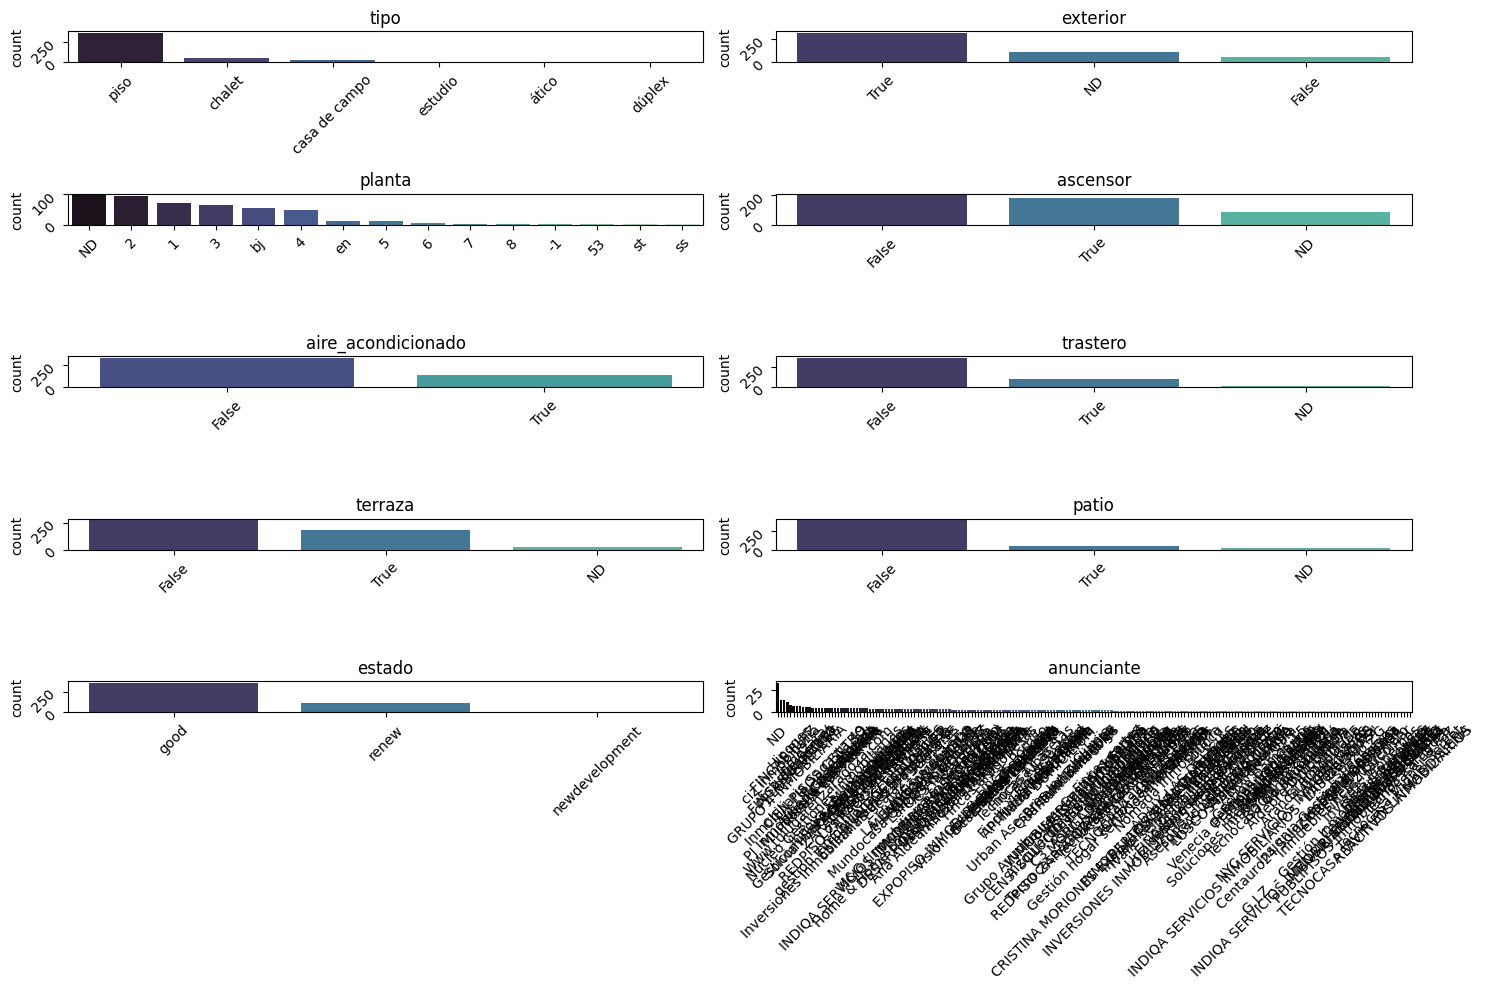

In [365]:
sp.plot_cat(df_cat_sale)

- En este caso vemos que, las variables categóricas se comportan como tales, y en general, se reparten entre las categorías, guardando relación con el estado de las viviendas en la provincia de Guadalajara.

- La excepción es anunciantes, que cuenta con una gran cantidad de categorías, por lo tanto, las eliminaremos del modelo.

- Como hemos mencionado antes, sobre estos datos no realizaremos operaciones adicionales, por cuanto no se utilizarán para crear un modelo, únicamente añadiremos el distrito.

- Para poder asignar las coordenadas de cada vivienda a un distrito, transformamos la latitud y la longitud de entrada a un geopunto, y uniremos el nuevo GDF con nuestro GDF de distritos. Asignamos el tipo de CRS y guardamos en un archivo de tipo `geojson`.
- También vamos a eliminar la columna 'tags_imagenes', por cuanto no la vamos a utilizar.

In [366]:
gdf_distritos = gpd.read_file("../data/transformed/gdf_distritos.geojson")

In [368]:
gdf_sale = gpd.GeoDataFrame(df_sale, geometry=gpd.points_from_xy(df_sale.longitud, df_sale.latitud))
gdf_sale.crs = "EPSG:4326"

In [371]:
gdf_sale_join = gpd.sjoin(gdf_sale, gdf_distritos, how="inner", predicate="within")
gdf_sale_join.drop(columns=["index_right", "latitud", "longitud", "tags_imagenes"], inplace=True)
gdf_sale_join.head(1)

,codigo,precio,precio_por_zona,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,estado,direccion,descripcion,anunciante,contacto,cantidad_imagenes,urls_imagenes,geometry,distrito
0,104792745,149900.0,1180.0,piso,True,4,True,127.0,3,2,False,False,False,True,good,"carretera de Huesca, 21","Junto a la Academia General Militar, en carret...",FINCAS RUIZ,876210884,39,['https://img4.idealista.com/blur/WEB_LISTING-...,POINT (-0.86935 41.6973),Distrito Rural


- Dado que la columna cantidad de imágenes no aporta al análisis de rentabilidad, vamos a eliminarla como paso previo a guardar el dataframe.

In [ ]:
gdf_sale_join.drop(columns="cantidad_imagenes", inplace=True)

In [ ]:
gdf_sale_join.to_file("../data/transformed/final_sale.geojson", driver="GeoJSON")

## DataFrame Alquiler
### Análisis Exploratorio de Datos

In [448]:
df_rent = pd.read_csv('../data/raw/idealista_rent.csv', index_col=0)
df_rent.head(1)

,codigo,latitud,longitud,precio,precio_por_zona,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,estado,direccion,descripcion,fecha,anunciante,contacto,cantidad_imagenes,urls_imagenes,tags_imagenes
0,107028216,41.681202,-1.024342,750.0,6.0,piso,True,2,True,123.0,2,1,False,False,True,False,good,avenida Jota,En Garrapinillos tienes un Esplendido piso sem...,2025-01-15,RE/MAX Y TÚ,876210900,39,['https://img4.idealista.com/blur/WEB_LISTING-...,"['livingRoom', 'corridor', 'room', 'room', 'ro..."


- La primera operación que realizaremos es eliminar las columnas que no vamos a utilizar para el análisis, en este caso, el contacto, cantidad_imagenes, urls_imagenes y tags_imagenes.

- También eliminaremos las que representan valores únicos, como pueden ser código, la dirección, descripción, la fecha y el contacto.

In [449]:
df_rent.drop(columns=['codigo', 'direccion', 'descripcion', 'fecha', 'anunciante', 'contacto', 'cantidad_imagenes', 'urls_imagenes', 'tags_imagenes'], inplace=True)

- Vamos a explorar ahora los datos que contiene.

In [450]:
sp.exploracion_datos(df_rent)

El número de filas es 450 y el número de columnas es 16

----------

En este conjunto de datos tenemos 12 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


exterior              1.777778
planta                2.444444
ascensor              1.555556
aire_acondicionado    0.444444
trastero              0.888889
terraza               1.111111
patio                 1.111111
estado                0.444444
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
latitud,450.0,41.649196,0.012342,41.618272,41.642110,41.648572,41.655050,41.739365
longitud,450.0,-0.890272,0.024000,-1.077204,-0.897481,-0.885318,-0.877922,-0.810870
precio,450.0,916.440000,238.280500,470.000000,750.000000,850.000000,1000.000000,1500.000000
precio_por_zona,450.0,11.853333,3.738180,5.000000,9.250000,11.000000,13.000000,29.000000
tamanio,450.0,82.560000,27.997330,25.000000,62.000000,78.000000,97.000000,200.000000
habitaciones,450.0,2.402222,0.985641,0.000000,2.000000,2.000000,3.000000,5.000000
banios,450.0,1.353333,0.514424,1.000000,1.000000,1.000000,2.000000,4.000000



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
tipo,450,6,piso,407
exterior,442,2,True,381
planta,439,18,2,86
ascensor,443,2,True,398
aire_acondicionado,448,2,True,252
trastero,446,2,False,364
terraza,445,2,False,230
patio,445,2,False,398
estado,448,2,good,445



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitud             450 non-null    float64
 1   longitud            450 non-null    float64
 2   precio              450 non-null    float64
 3   precio_por_zona     450 non-null    float64
 4   tipo                450 non-null    object 
 5   exterior            442 non-null    object 
 6   planta              439 non-null    object 
 7   ascensor            443 non-null    object 
 8   tamanio             450 non-null    float64
 9   habitaciones        450 non-null    int64  
 10  banios              450 non-null    int64  
 11  aire_acondicionado  448 non-null    object 
 12  trastero            446 non-null    object 
 13  terraza             445 non-null    object 
 14  patio               445 non-null    object 
 15

None

- Habiendo identificado 11 datos duplicados,  los vamos a eliminar y rellenar los nulos con una nueva categoría "ND".

In [451]:
df_rent.drop_duplicates(inplace=True)

In [452]:
df_rent.isna().sum()

latitud                0
longitud               0
precio                 0
precio_por_zona        0
tipo                   0
exterior               8
planta                11
ascensor               7
tamanio                0
habitaciones           0
banios                 0
aire_acondicionado     2
trastero               4
terraza                5
patio                  5
estado                 2
dtype: int64

In [453]:
columnas_fillna_rent = ['exterior', 'planta', 'ascensor', 'aire_acondicionado', 'trastero', 'terraza', 'patio', 'estado']
df_rent[columnas_fillna_rent] = df_rent[columnas_fillna_rent].fillna("ND")

- Vamos ahora a asignar el distrito según las coordenadas geográficas, dado que, el indicado en el anuncio no se corresponde necesariamente con el correcto.

In [454]:
gdf_rent = gpd.GeoDataFrame(df_rent, geometry=gpd.points_from_xy(df_rent.longitud, df_rent.latitud))
gdf_rent.crs = "EPSG:4326"

In [455]:
gdf_rent_join = gpd.sjoin(gdf_rent, gdf_distritos, how="inner", predicate="within")
gdf_rent_join.drop(columns=["index_right", "latitud", "longitud"], inplace=True)

In [456]:
gdf_rent_join.head(1)

,precio,precio_por_zona,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,estado,geometry,distrito
0,750.0,6.0,piso,True,2,True,123.0,2,1,False,False,True,False,good,POINT (-1.02434 41.6812),Distrito Rural


- Vamos ahora a visualizar las variables numéricas, categóricas y su relación, realizando primero la separación de variables según su tipo.

In [457]:
df_num_rent, df_cat_rent = sp.separar_dataframe(gdf_rent_join)

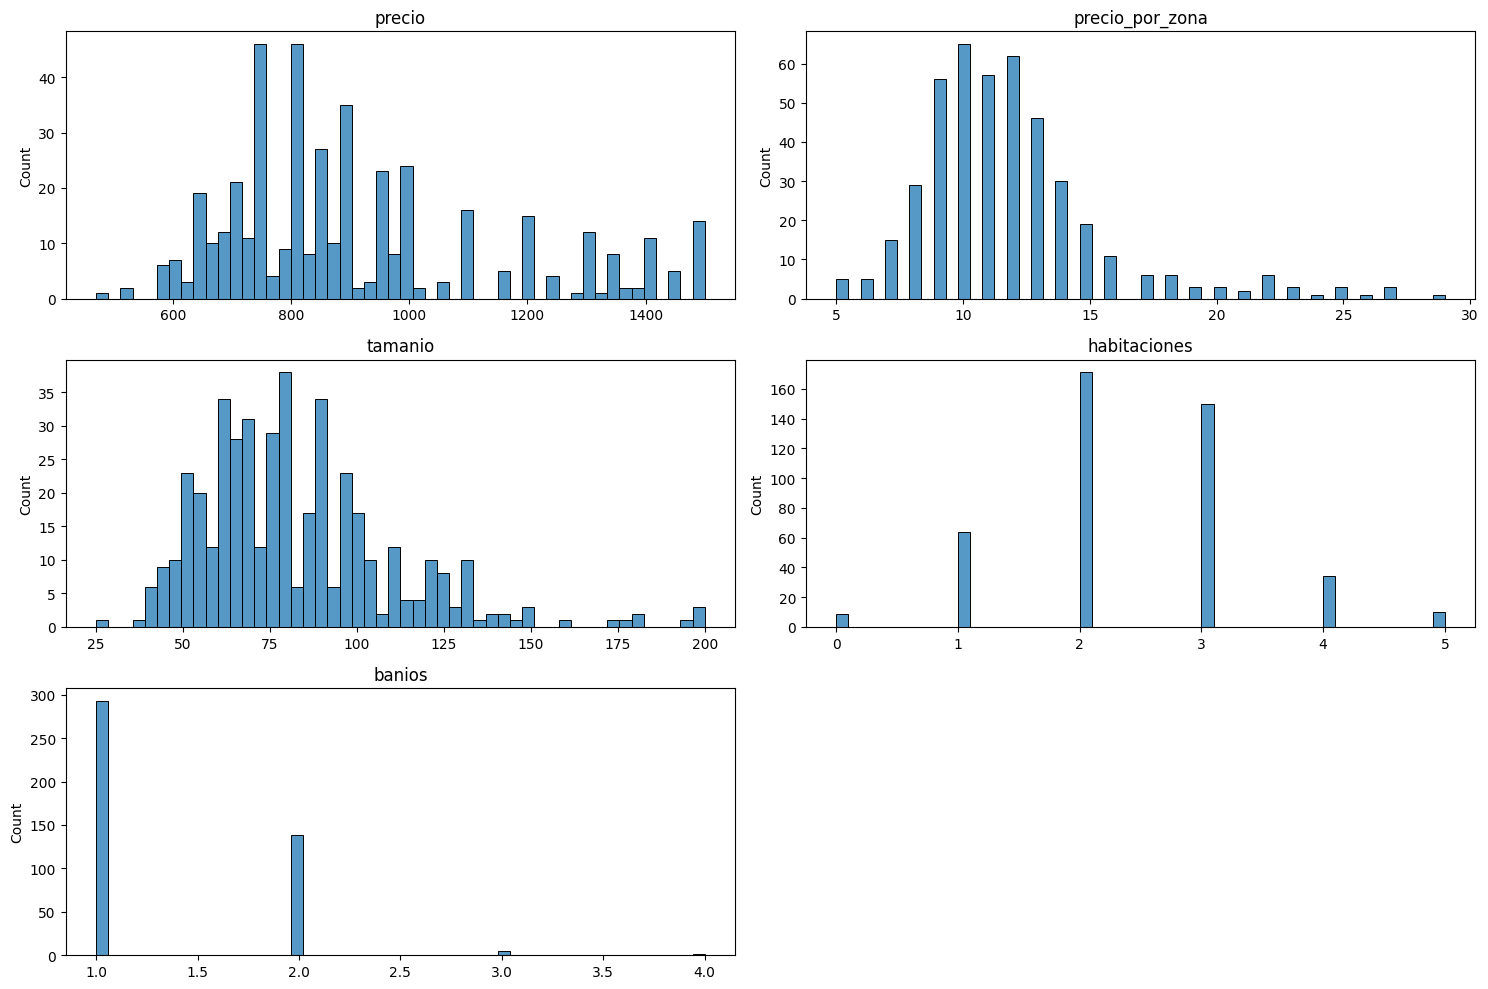

In [458]:
sp.plot_numericas(df_num_rent)

- Como primera observación, vemos que, las distribuciones no son normales, aunque en algunos casos podrían acercarse.

- De las gráficas podemos concluir que, en el caso del precio y el tamaño, se comportan como variables numéricas, estando distribuidas en el rango de las gráficas.

- Como hemos comentado en el caso de las habitaciones y los baños, se comportan más como categóricas, existiendo pocas categorías, de modo que, las convertiremos a string.

In [459]:
gdf_rent_join[["habitaciones", "banios"]] = gdf_rent_join[["habitaciones", "banios"]].astype(str)

- Veamos ahora las categóricas.

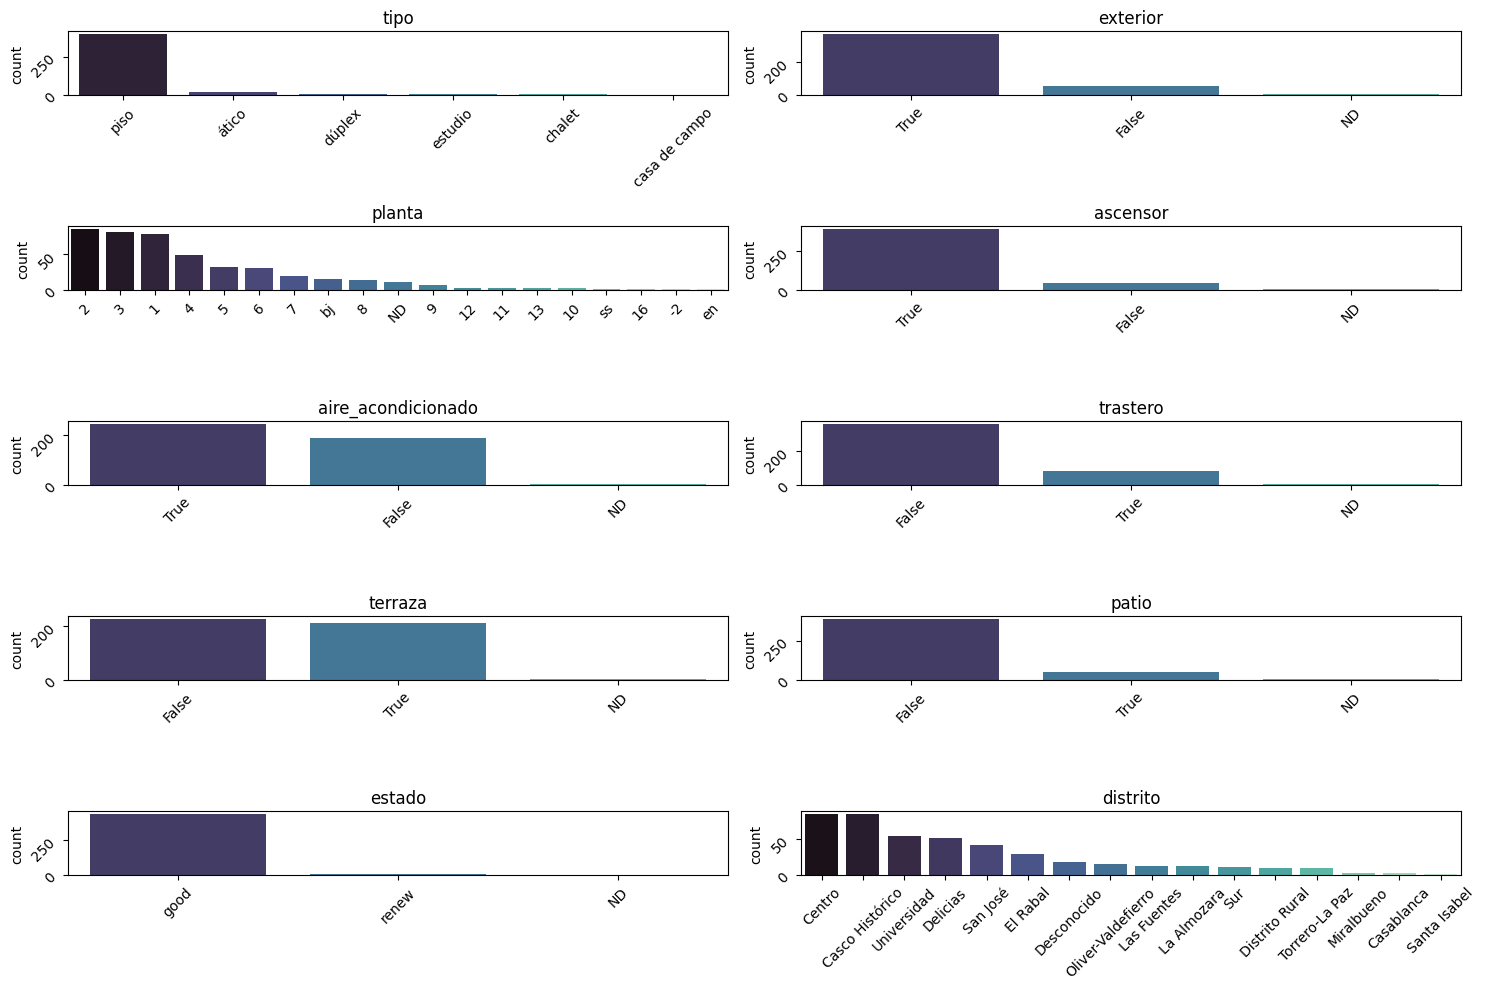

In [460]:
sp.plot_cat(df_cat_rent)

- En las gráficas podemos ver que, la mayoría de las viviendas son de tipo "piso" y se encuentran en estado "good". En el resto de variables, se encuentran distribuidas dentro de las categorías, siendo la mayoría exteriores, con ascensor, aire acondicionado, sin trastero y sin terraza.

- La mayoría de las viviendas disponibles están en los distritos Centro, casco Histórico, Universidad, Delicias y San José.

- Dado que con estos datos crearemos un modelo, vamos a analizar la relación entre las variables.

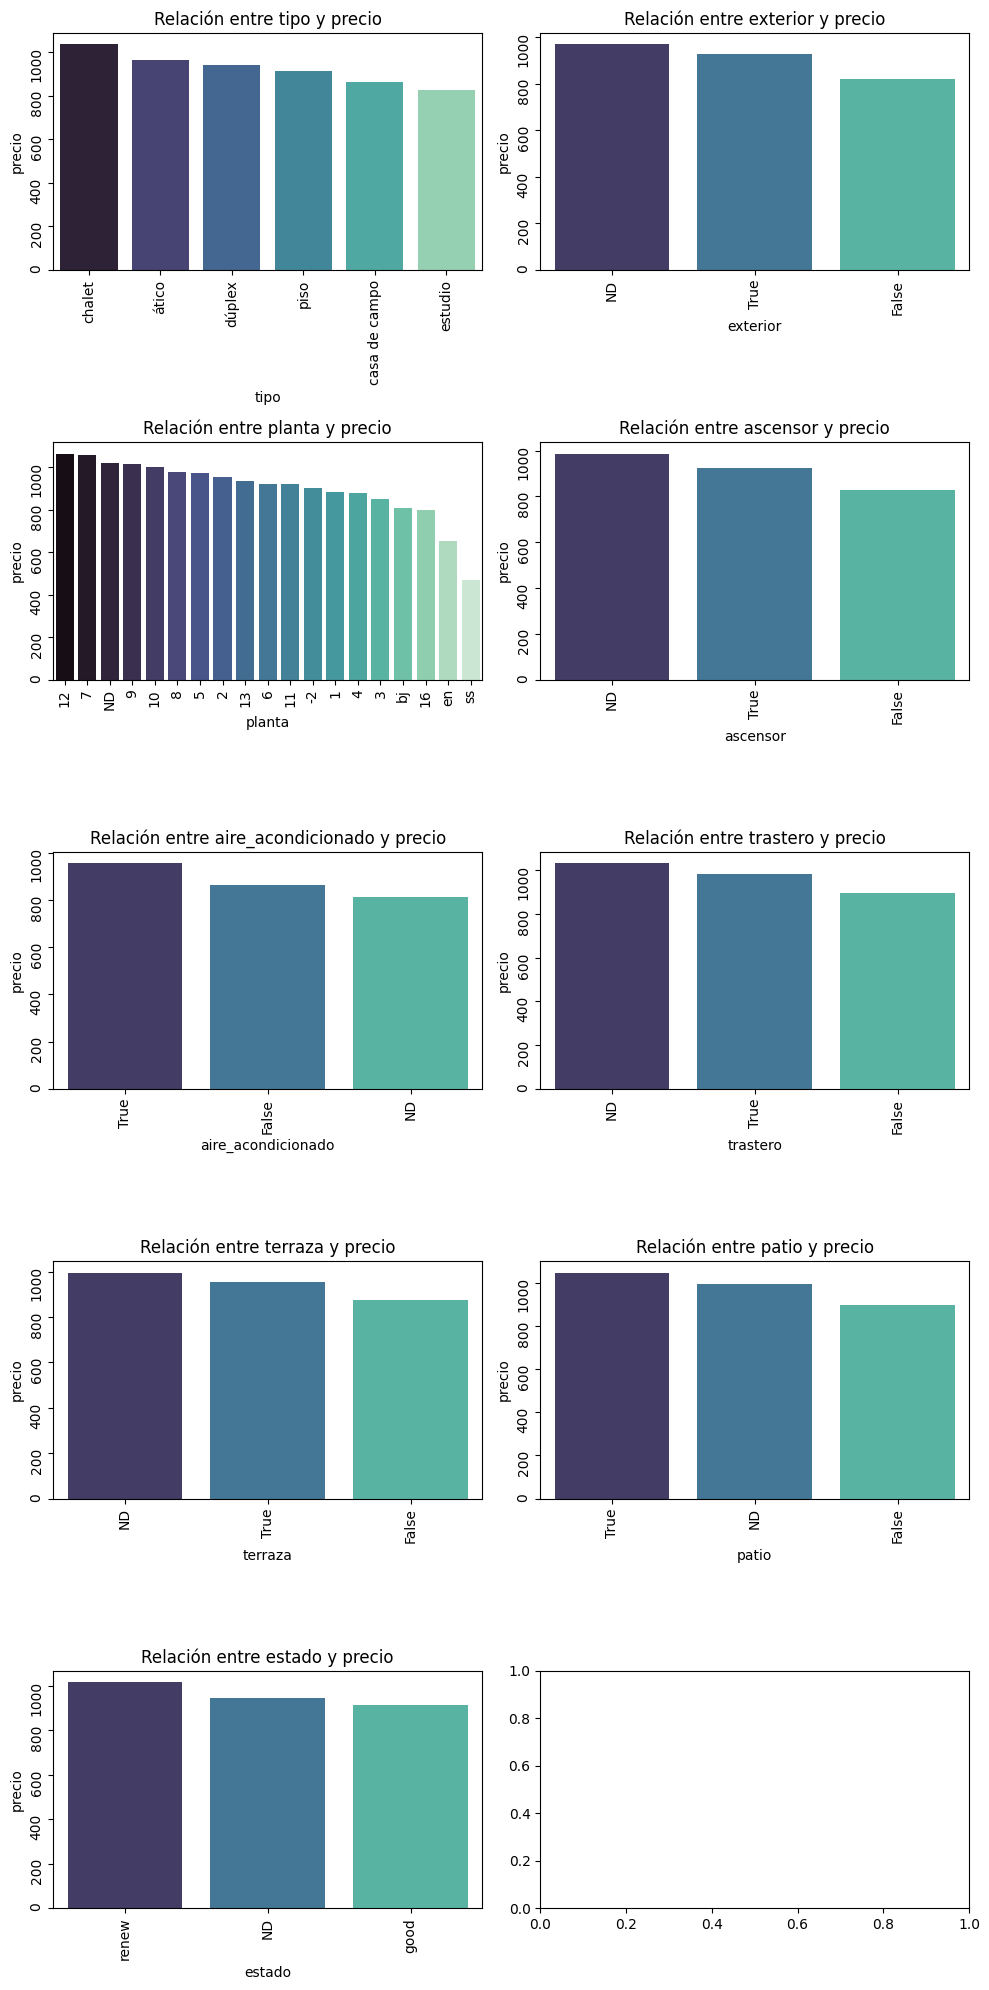

In [461]:
sp.relacion_vs_cat(df_rent, "precio", tamano_grafica=(10,20))

- En esta relación podemos ver que, excepto una, tienen sentido. Por ejemplo:
    - Los chalets son las viviendas más caras.
    - Los pisos exteriores, con aire acondicionado, trastero y terraza aumentan el precio del alquiler.

- En el caso del estado, no tiene sentido que, las viviendas que necesitan reforma sean más caras. Por ello, eliminaremos esta variable del modelo.

In [462]:
gdf_rent_join.drop(columns="estado", inplace=True)

- Para una visualización más sencilla, vamos a crear un nuevo DF sin las variables numéricas código, latitud y longitud.

In [463]:
df_rent_graficas = df_rent.drop(columns=["latitud", "longitud"])

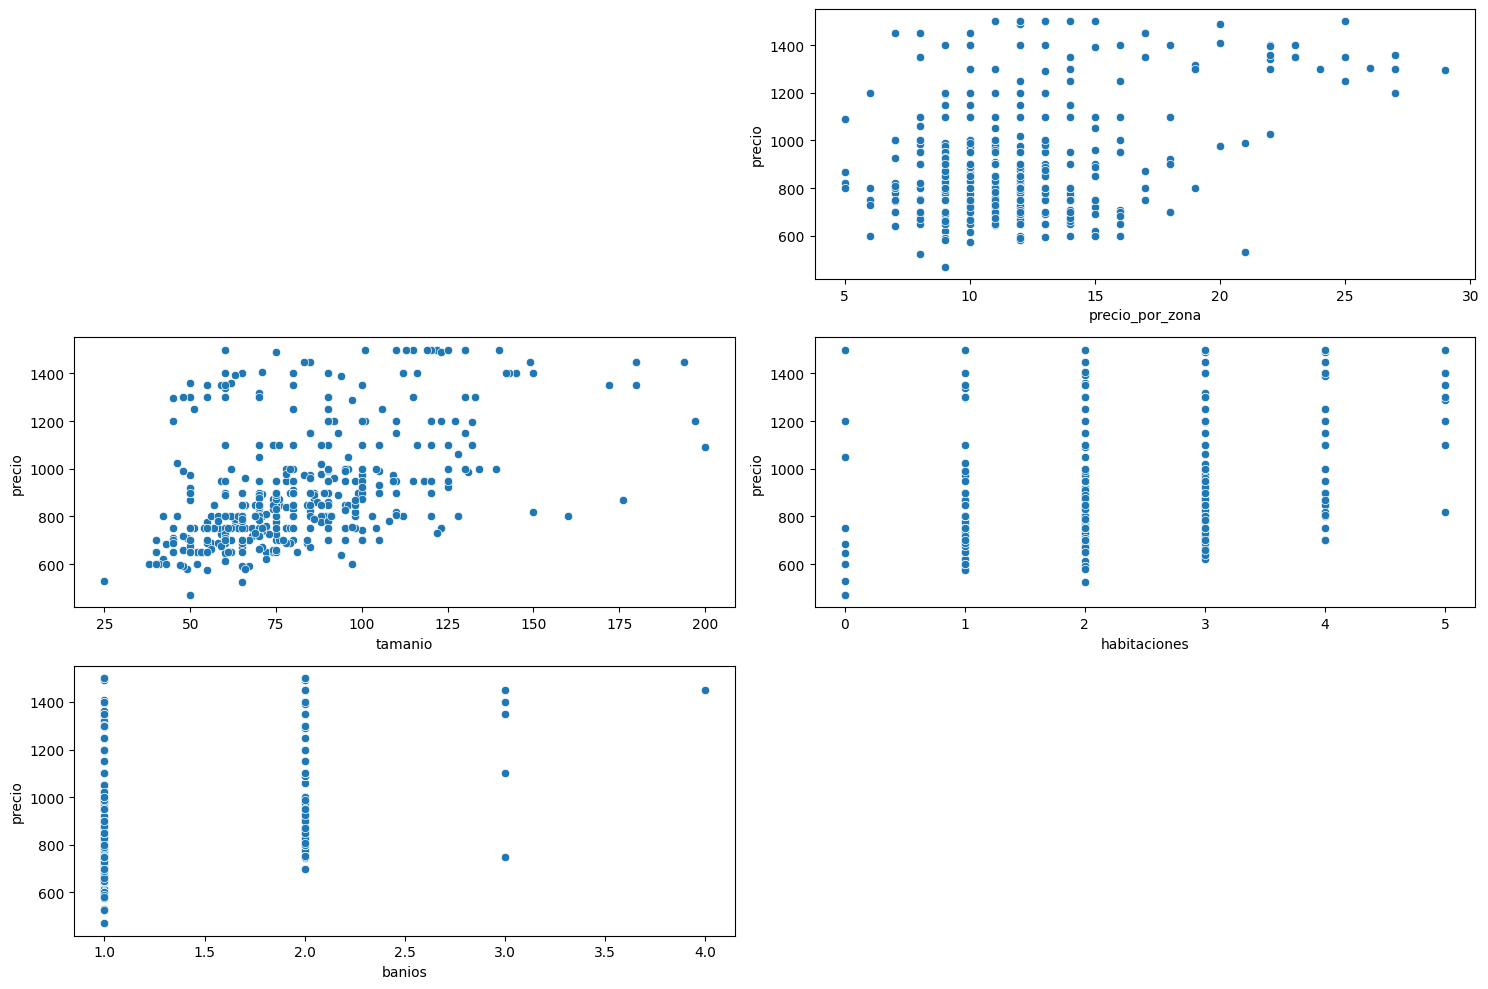

In [464]:
sp.relacion_vs_numericas(df_rent_graficas, "precio")

- En esta relación podemos ver que, en el caso del tamaño, en general, el precio aumenta a mayor cantidad de metros cuadrados, lo cual tiene sentido.

- El resto no las analizaremos por cuanto, hemos determinado que las habitaciones y los baños tiene comportamiento de numéricas, y el código, la latitud y la longitud no son variables para el análisis.

- En el caso del precio por zona, la gráfica no puede interpretarse, y aunque es una variable que puede ayudar a predecir el precio, no la tendremos como parte de los inputs, así que tendremos que eliminarla del modelo.

- Vamos ahora a analizar la matriz de correlación.

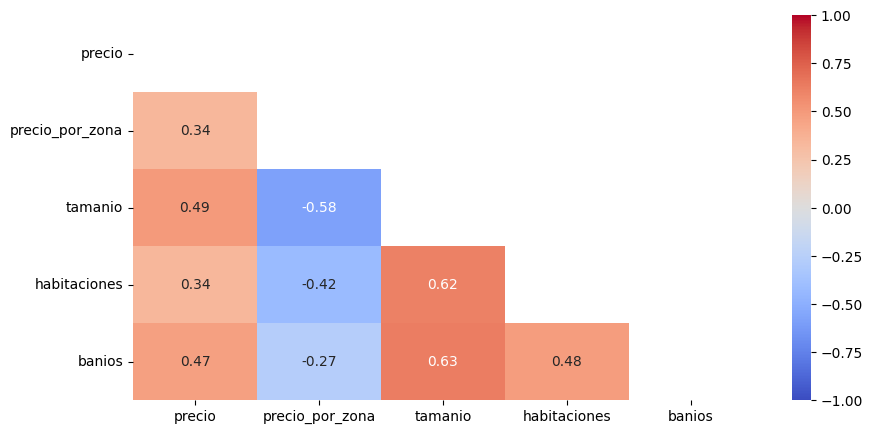

In [465]:
sp.matriz_correlacion(df_rent_graficas)

- En el caso del precio, observamos una correlación positiva moderada con el tamaño y los baños. Esto significa que, a mayor tamaño y mayor cantidad de baños, el precio aumenta. Es débil con las habitaciones y el precio por zona, lo que nos indica que, podrían ser variables que no tengan un efecto importante sobre el modelo.
- Es moderada y positiva la correlación del tamaño con las habitaciones y los baños. Esto es razonable, a mayor cantidad de metros cuadrados, más baños y habitaciones.
- Al observar el precio por zona, vemos una correlación negativa moderada con el tamaño, y débil con las habitaciones y los baños, lo cual tiene sentido.

### Encoding

Recordemos el dataframe.

In [466]:
gdf_rent_join.head(1)

,precio,precio_por_zona,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,geometry,distrito
0,750.0,6.0,piso,True,2,True,123.0,2,1,False,False,True,False,POINT (-1.02434 41.6812),Distrito Rural


- Dado que, las viviendas de alquiler sólo las utilizaremos para crear el modelo, eliminaremos la columna geometry.
- Eliminaremos además la columna 'precio_por_zona', por el motivo que habíamos explicado.

In [467]:
gdf_rent_join.drop(columns= "geometry", inplace=True)
gdf_rent_join.drop(columns= "precio_por_zona", inplace=True)

- Revisamos los tipos de datos.

In [468]:
gdf_rent_join.dtypes

precio                float64
tipo                   object
exterior               object
planta                 object
ascensor               object
tamanio               float64
habitaciones           object
banios                 object
aire_acondicionado     object
trastero               object
terraza                object
patio                  object
distrito               object
dtype: object

- Tenemos 3 variables numéricas y 11 categóricas.

In [469]:
lista_col_categ = gdf_rent_join.select_dtypes(include="O").columns.tolist()

- Con un barplot, somos capaces de visualizar la relación entre la variable respuesta (precio) y el resto de las variables categóricas.

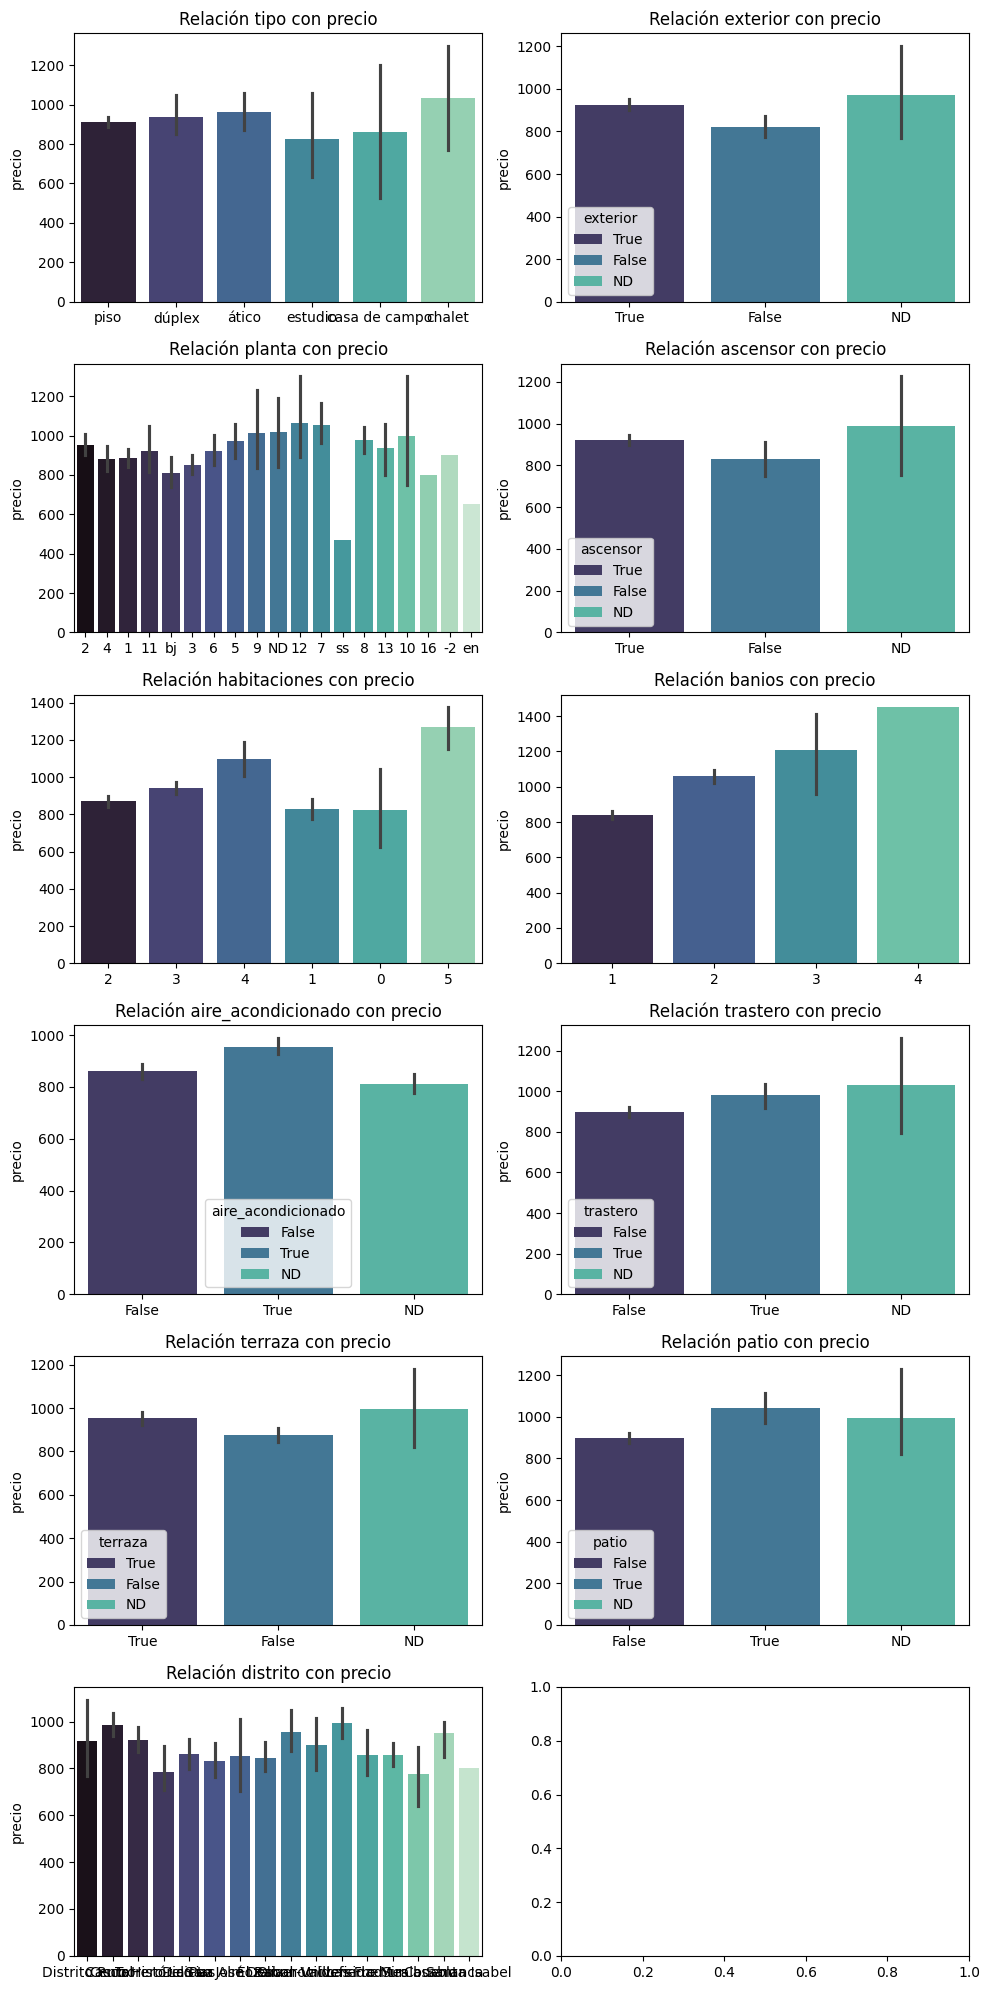

In [470]:
sa.visualizar_categorias(gdf_rent_join, lista_col_categ, "precio", tipo_grafica="barplot", tamanio_grafica=(10,20))

- Como hemos mencionado antes, en la mayoría de los casos, somos capaces de observar diferencias significativas, pero, para comprobarlo matemáticamente, tenemos a nuestro alcance tests estadísticos.

#### Diferencias entre categorías y orden
- Vamos a comprobar la normalidad y homocedasticidad, con el fin de identificar si son o no paramétricas, y comprobar diferencias.

- Para evaluar si hay diferencias entre las categorías de nuestras variables predictoras categóricas y dónde se encuentran, utilizaremos el test Kruskal, dado que todas las variables respuesta tienen más de 2 categorías.

In [471]:
lista_col_categ

['tipo',
 'exterior',
 'planta',
 'ascensor',
 'habitaciones',
 'banios',
 'aire_acondicionado',
 'trastero',
 'terraza',
 'patio',
 'distrito']

In [472]:
gdf_rent_join.dtypes

precio                float64
tipo                   object
exterior               object
planta                 object
ascensor               object
tamanio               float64
habitaciones           object
banios                 object
aire_acondicionado     object
trastero               object
terraza                object
patio                  object
distrito               object
dtype: object

In [473]:
# asunciones = sa.Asunciones(dataframe = gdf_rent_join, columna_numerica = "precio")
# print("\n__________________________\n")

# for categoria in lista_col_categ:

#     print(f"Estamos analizando la variable {categoria.upper()}")
    
#     asunciones.identificar_normalidad(metodo = "shapiro") 

#     asunciones.identificar_homogeneidad(columna_categorica = categoria)

#     test = se.TestEstadisticos(gdf_rent_join, "precio", categoria)
#     test.run_all_tests()
#     print("\n__________________________\n")

In [474]:
visual_encoding = sa.Analisis_Visual_Encoding(gdf_rent_join, lista_col_categ, "precio")

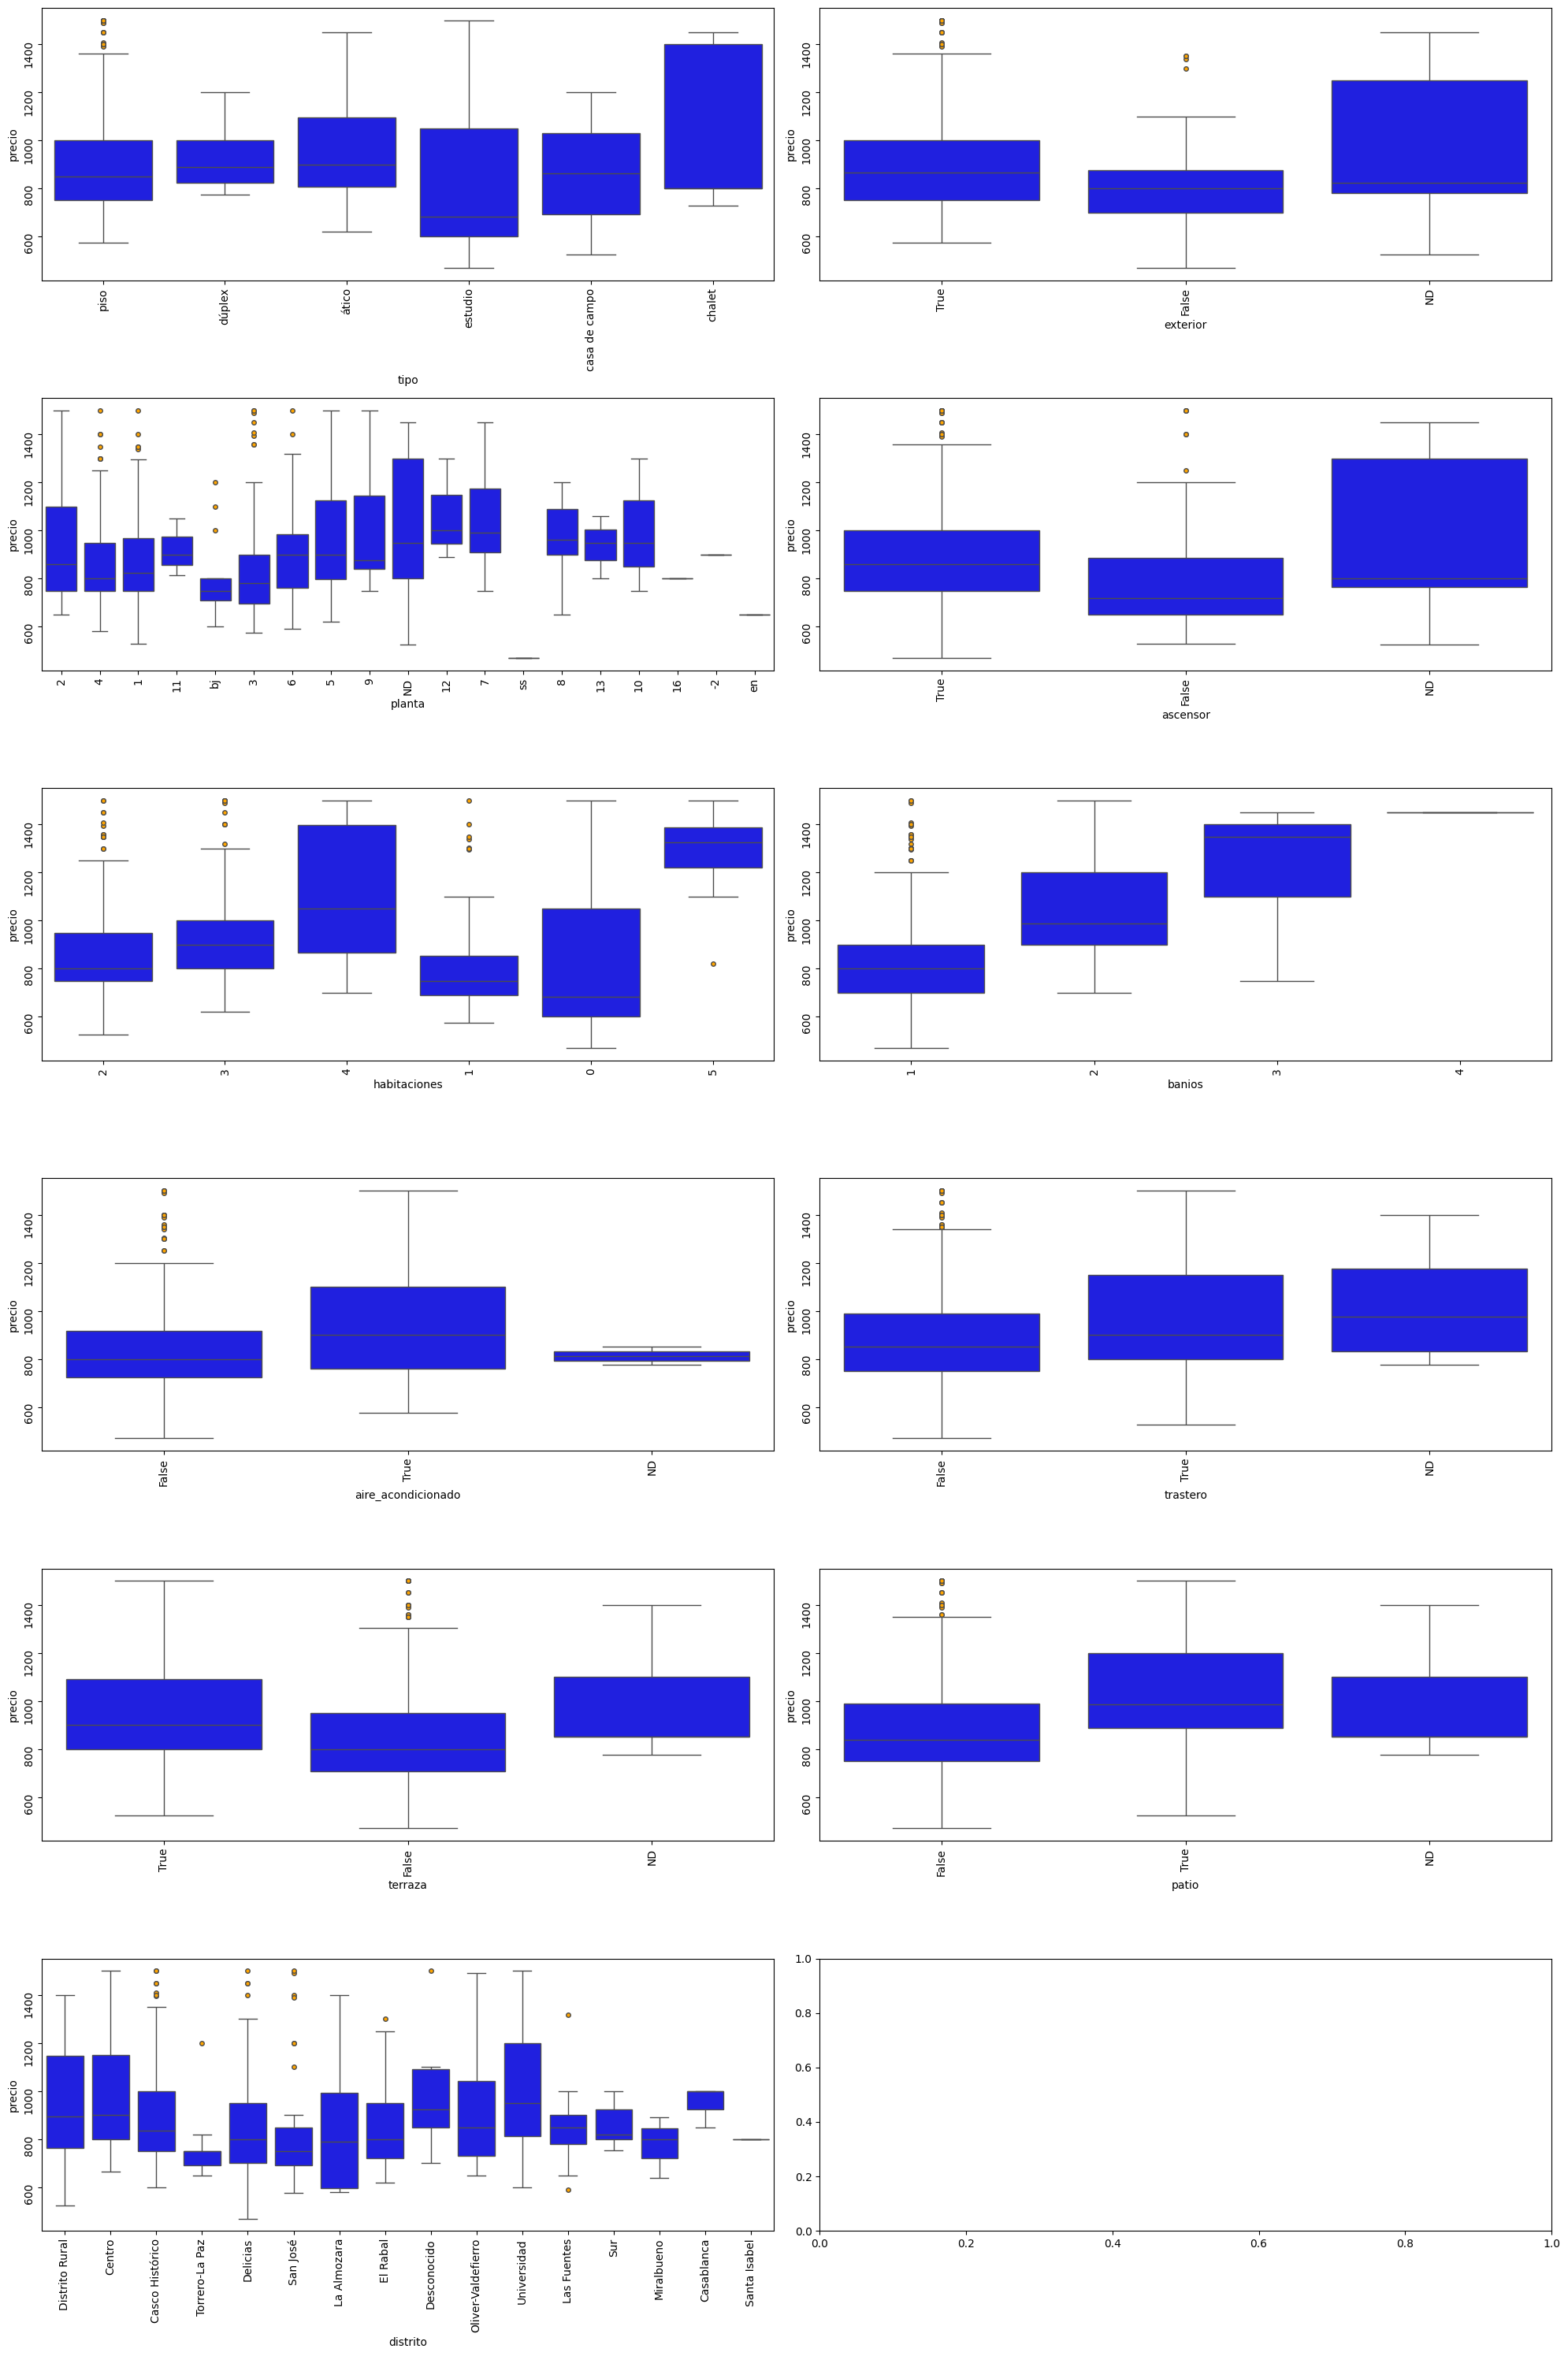

In [475]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

- Con ayuda de los tests y las visualizaciones, hemos identificado que existen diferencias significativas para las variables XXXXXX, por sus p-valores <0,05.

- En el caso de ascensor, exterior, aire acondicionado, trastero, terraza y patio, que contienen valores booleanos (True-False) y otra categoría -ND-, los sustituiremos haciendo un mapeo con -1, 0 y 1, para dar o restar importancia. No hará falta utilizar otro método de encoding.

- Por su parte, para floor, sustituiremos los valores alfabéticos para que representen su importancia, sustituyendo de la siguiente manera:
    - Sin información: 0
    - st: -3
    - ss: -2
    - bj: -1
    - en: 0.5

In [476]:
dicc_sust_planta = {
    'st': -3, 
    'ss': -2,
    'bj': -1,
    'en': 0.5, 
    'ND': 0
}

gdf_rent_join['planta'] = gdf_rent_join['planta'].map(dicc_sust_planta).fillna(gdf_rent_join['planta']) 

In [477]:
lista_col_bools = ["ascensor", "exterior", "aire_acondicionado", "trastero", "terraza", "patio"]

for columna in lista_col_bools:
    gdf_rent_join[columna] = gdf_rent_join[columna].astype(str).replace(
        {"True": 1, "False": -1, "ND": 0})

In [478]:
gdf_rent_join.head(1)

,precio,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,distrito
0,750.0,piso,1,2,1,123.0,2,1,-1,-1,1,-1,Distrito Rural


- Ahora vamos a crear un diccionario con las variables a las que se les va a aplicar el encoding.
- Nos quedaremos con el target encoder por cuanto, asigna peso a las variables teniendo en cuenta la variable respuesta.

In [479]:
gdf_rent_join.reset_index(inplace=True, drop=True)

In [480]:
diccionario_encoding = {
    "onehot": [],
    "dummies": [],
    "ordinal": {},
    "label": [],
    "frequency": [],
    "target": ["tipo", "distrito"]
}

In [481]:
encoding = se.Encoding(gdf_rent_join, diccionario_encoding, "precio")

In [482]:
df_rent_enc, target_encoder = encoding.target_encoding()
df_rent_enc.head()

,precio,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,distrito
0,750.0,911.616751,1,2,1,123.0,2,1,-1,-1,1,-1,915.120106
1,1300.0,911.616751,1,4,1,130.0,3,2,-1,-1,-1,-1,986.629118
2,775.0,919.568273,1,1,1,75.0,2,1,1,-1,1,-1,921.986525
3,815.0,938.211340,1,11,1,70.0,2,1,1,-1,1,-1,986.629118
4,750.0,911.616751,1,-1.0,1,95.0,4,2,1,-1,-1,-1,881.274823


In [483]:
# with open('../transformers/target_encoder.pkl', 'wb') as f:
#     pickle.dump(target_encoder, f)

### Gestión de Outliers

- Transformamos temporalmente las columnas que deben ser categóricas pero durante el encoding se han convertido en numéricas.

In [484]:
df_rent_enc[['tipo', 'exterior', 'planta', 'ascensor', 'habitaciones', 'banios', 'aire_acondicionado', 'trastero', 'terraza', 'patio', 'distrito']] = df_rent_enc[['tipo', 'exterior', 'planta', 'ascensor', 'habitaciones', 'banios', 'aire_acondicionado', 'trastero', 'terraza', 'patio', 'distrito']].astype(str)

- Como primer paso, vamos a identificar los outliers de las features numéricas en boxplots:

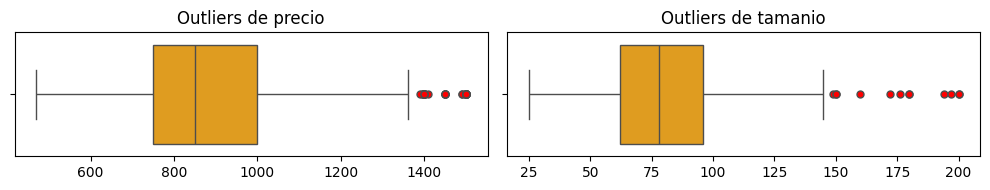

In [485]:
sp.detectar_outliers(df_rent_enc, tamano_grafica=(10,2))

- Vemos que, tenemos outliers en ambas features numéricas. Pese a que los outliers se encuentran dentro de los límites de la búsqueda.
- Para verlos numéricamente, vamos a recurrir al método IFO, que se usa en la detección de univariados, es decir, busca detectar valores atípicos basado únicamente en la distribución de esa variable.

In [486]:
df_rent_enc = sp.outliers_isolation_forest(df_rent_enc)

In [487]:
df_rent_enc, df_filtrado = sp.filtrar_outliers(df_rent_enc, 0.7, drop_indices=True)
df_rent_enc.reset_index(inplace=True, drop=True)

Se han filtrado 6 filas, que representan un 1.37% del dataframe original.


,precio,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,distrito,outliers_ifo_0.01_50,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_50,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_50,outliers_ifo_0.1_100,outliers_ifo_0.1_200
23,530.0,891.7916470853521,-1,1,-1,25.0,0,1,-1,-1,1,-1,915.1201058864708,-1,-1,-1,-1,-1,-1,-1,-1,-1
212,1450.0,936.1551170511461,0,0.0,0,194.0,3,4,1,-1,1,1,862.4913405993424,-1,-1,-1,-1,-1,-1,-1,-1,-1
228,1090.0,938.2113401678957,1,8,1,200.0,2,2,1,1,1,1,933.0142489163833,1,-1,-1,-1,-1,-1,-1,-1,-1
235,1450.0,911.6167512690355,1,3,1,180.0,4,2,1,-1,1,-1,989.7816198449632,-1,1,1,-1,-1,-1,-1,-1,-1
326,1090.0,938.2113401678957,1,8,1,200.0,2,2,1,1,1,1,933.0142489163833,1,-1,-1,-1,-1,-1,-1,-1,-1


Se han eliminado 6 filas (1.0%) del dataframe original.


- Vemos que, filtrando los datos que son outliers en un 70% de las combinaciones, tenemos únicamente 6 registros. Estos outliers, hacen referencia al tamaño, teniendo en el límite inferior una vivienda de 25m2, y en el superior algunas de más de 180m2.

- Entendiendo este filtrado como razonable, vamos a eliminarlos del dataset, y hacer un reset de los índices.

### Estandarización

- Como primer paso, cambiamos a formato numérico todas nuestras columnas. Luego, creamos una variable que almacene esas features a estandarizar, que en este caso es sólamente el tamaño.

In [531]:
df_rent_enc = df_rent_enc.astype(float)
columnas_scaling = ['tamanio']

- Ahora aplicamos los escaladores.

In [532]:
df_escaladores_graf = ss.aplicar_escaladores(df_rent_enc, columnas_scaling, [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

- Los representamos visualmente.

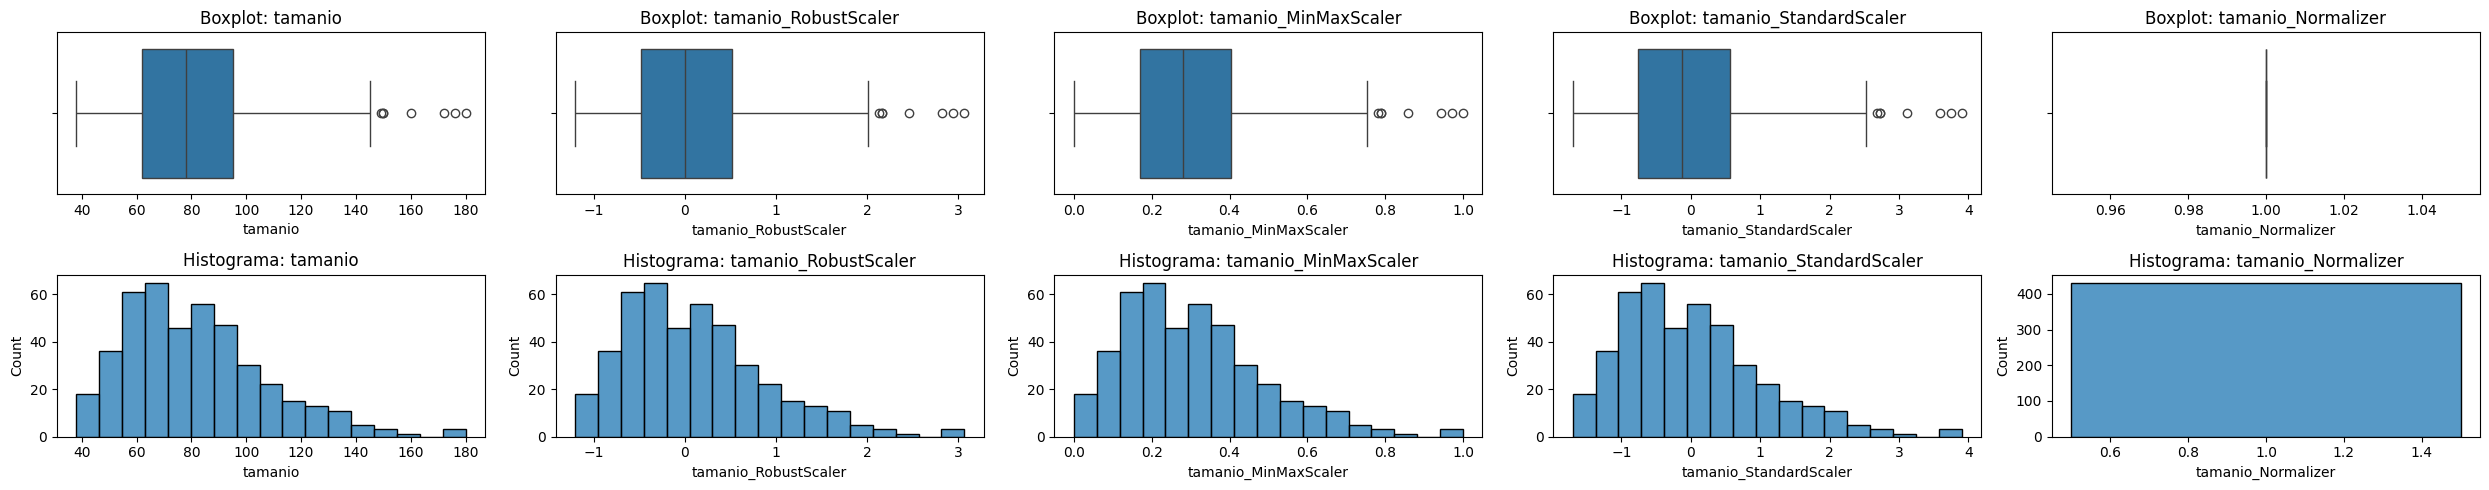

In [533]:
ss.graficar_escaladores(df_escaladores_graf, columnas_scaling, df_escaladores_graf.filter(like="_").columns)

- Nos quedaremos con el Standard Scaler, dado que, en las gráficas, cuando comparamos con los datos sin escalar, no se observan grandes diferencias entre el Robust, MinMax y el Standard (sabemos que por la naturaleza del Normalizer, tenemos resultados distintos), y lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [534]:
df_rent_standard, scaler = ss.aplicar_escaladores(df_rent_enc, columnas_scaling, [StandardScaler()], return_scalers= True)
df_rent_standard.head(1)

,precio,tipo,exterior,planta,ascensor,tamanio,habitaciones,banios,aire_acondicionado,trastero,terraza,patio,distrito
0,750.0,911.616751,1.0,2.0,1.0,1.652795,2.0,1.0,-1.0,-1.0,1.0,-1.0,915.120106


- Con este paso, finaliza el preprocesamiento de los datos, de modo que, guardaremos el dataframe que llevamos al notebook #3, Modelos.

In [535]:
#df_rent_standard.to_pickle("../data/transformed/final_rent.pkl")